<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r3_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-15-m-1-r3.csv?token=AKVFSOFIL4UB6XQSJH6H2PC62ATWE')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-15-m-11-r3.csv?token=AKVFSOD2MCNK73ICTZGIHVC62ATWG')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-4-m-1-r3.csv?token=AKVFSOADELX43WLKPRDFU6S62ATWQ')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-4-m-11-r3.csv?token=AKVFSOHCORXF3IP3A4PKO6K62ATWU')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-6-m-1-r3.csv?token=AKVFSODKIV24MB5KNQXKYE262ATW4')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-6-m-11-r3.csv?token=AKVFSOH25NFCWDZAKSL3PDC62ATXA')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-9-m-1-r3.csv?token=AKVFSOC5YUH7365OJ6VMS5262ATXK')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-9-m-11-r3.csv?token=AKVFSOCO6JGOP22XL3ZT6VS62ATXM')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-normal-n-0-15-r3.csv?token=AKVFSOCRQ7N5ARTVT55VYEC62ATXW')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-normal-n-0-4-r3.csv?token=AKVFSOBRISTWFGVAT75SG5262ATXY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-normal-n-0-6-r3.csv?token=AKVFSOEYRQ5MXQUDR5TUUC262ATX4')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-normal-n-0-9-r3.csv?token=AKVFSOF5MTZZOPDAOXHC2D262ATYA')

df1['target'] = 0
df2['target'] = 0
df3['target'] = 0
df4['target'] = 0
df5['target'] = 0
df6['target'] = 0
df7['target'] = 0
df8['target'] = 0

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(33259, 30)
(28688, 30)
(32130, 30)
(27630, 30)
(32124, 30)
(27630, 30)
(32160, 30)
(27624, 30)
(20553, 30)
(19458, 30)
(19457, 30)
(19454, 30)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9,0
1,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9,0
2,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9,0
3,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9,0
4,19,1,4,1,1,4,3,10,0,0,23,7,1,4,3,0.750000,16,1,2,2,2,4,4,1,4,4,3,30,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320162,3275323,1,4,7,1,4,3,9,18,2,15,15,20057,4,1,0.250000,9,1,1,1,1,1,4,7,28,561596,21,27,63,1
320163,3275842,1,4,7,1,4,3,9,17,1,15,15,30089,5,2,0.400000,14,1,1,1,1,1,4,7,28,842492,21,27,63,0
320164,3276048,1,4,7,1,4,3,9,18,2,15,15,30091,4,1,0.250000,10,1,1,1,1,1,4,7,28,842548,21,27,63,0
320165,3276342,1,4,7,1,4,3,9,17,1,15,15,30089,5,2,0.400000,14,1,1,1,1,1,4,7,28,842492,21,27,63,0


In [0]:
df.shape

(320167, 30)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-15-m-12-r3.csv?token=AKVFSODMLYRMZSB3VS33CGC62ATWK')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-15-m-7-r3.csv?token=AKVFSOHPLRDRYQVQBKUUYPS62ATWM')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-4-m-12-r3.csv?token=AKVFSOBVHXMU57MEUQNU5NS62ATWW')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-4-m-7-r3.csv?token=AKVFSOHDONC5IXEHPM2TIWK62ATW2')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-6-m-12-r3.csv?token=AKVFSOBPULJ3SMDXUHP2K6C62ATXC')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-6-m-7-r3.csv?token=AKVFSOFZN7KYEIOQDJXEG4C62ATXG')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-9-m-12-r3.csv?token=AKVFSOG2NJ34YJQG3WRVOJC62ATXO')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r3/2-fft-malicious-n-0-9-m-7-r3.csv?token=AKVFSOG7S4743PUWXMCXH4K62ATXS')

In [0]:
df13['target'] = 0
df14['target'] = 0
df15['target'] = 0
df16['target'] = 0
df17['target'] = 0
df18['target'] = 0
df19['target'] = 0
df20['target'] = 0

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(27630, 30)
(28688, 30)
(26430, 30)
(27630, 30)
(26430, 30)
(27590, 30)
(26430, 30)
(27630, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9,0
1,19,1,4,1,1,4,3,10,0,0,23,7,1,4,3,0.750000,16,1,2,2,2,4,4,1,4,4,3,30,9,0
2,332,1,4,1,1,4,3,9,1,1,23,7,11,3,2,0.666667,12,1,1,1,1,1,4,1,4,44,3,27,9,0
3,363,1,4,1,1,4,3,9,0,0,23,7,12,4,3,0.750000,16,1,1,1,1,1,4,1,4,48,3,27,9,0
4,604,1,4,1,1,4,3,9,1,1,23,7,20,3,2,0.666667,12,1,1,1,1,1,4,1,4,80,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32119,3265581,1,4,5,2,2,3,9,0,0,23,7,30081,4,3,0.750000,23,1,1,1,1,1,4,10,20,601620,15,27,45,0
32120,3265588,1,4,5,3,2,3,9,0,0,23,7,30081,4,3,0.750000,30,1,1,1,1,1,4,15,30,902430,15,27,45,0
32121,3265595,1,4,5,4,2,3,9,0,0,23,7,30081,4,3,0.750000,37,1,1,1,1,1,4,20,40,1203240,15,27,45,0
32122,3265602,1,4,5,5,3,3,9,0,0,23,7,30081,4,3,0.750000,44,1,1,1,1,1,4,25,75,2256075,15,27,45,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.671989,0.348134,0.011609,-0.016679,NaN,0.631690,-0.034529,0.192938,-0.905813,-0.956366,-0.411140,0.001079,0.111516,0.067168,0.067590,0.051440,-0.256576,0.151437,0.136625,0.070390,0.348134,0.631690,0.348134,0.006626
inport,-0.671989,1.000000,-0.219977,0.060086,-0.086391,NaN,-0.515120,0.101047,0.189375,0.660743,0.566842,0.374175,-0.024564,-0.094477,-0.071015,-0.071324,-0.060447,0.715215,-0.051236,-0.064063,0.012777,-0.219977,-0.515120,-0.219977,-0.005017
cache_coherence_type,0.348134,-0.219977,1.000000,0.349829,-0.502851,NaN,0.039993,0.000574,-0.033073,-0.387391,-0.375729,-0.552996,0.014061,0.004989,0.011364,0.015649,0.012917,-0.087840,0.527517,0.438797,0.298433,1.000000,0.039993,1.000000,-0.008775
flit_id,0.011609,0.060086,0.349829,1.000000,-0.139389,NaN,-0.105458,0.019254,0.027135,-0.013911,0.010281,0.509465,0.034714,0.004886,0.023623,0.030271,0.021063,0.030904,0.973780,0.926287,0.656048,0.349829,-0.105458,0.349829,0.006139
flit_type,-0.016679,-0.086391,-0.502851,-0.139389,1.000000,NaN,0.151601,-0.027694,-0.039029,0.019980,-0.014782,0.370079,-0.042778,0.063279,0.012230,-0.005668,-0.005636,-0.044453,-0.220891,0.054710,0.032040,-0.502851,0.151601,-0.502851,-0.008862
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.631690,-0.515120,0.039993,-0.105458,0.151601,NaN,1.000000,-0.036796,0.000762,-0.616939,-0.597279,-0.191416,0.011706,0.091644,0.061654,0.062383,0.050286,-0.312445,-0.031725,-0.008912,-0.033963,0.039993,1.000000,0.039993,0.000408
traversal_id,-0.034529,0.101047,0.000574,0.019254,-0.027694,NaN,-0.036796,1.000000,0.061953,0.036114,0.007417,0.040097,-0.256630,-0.256619,-0.306181,-0.236933,-0.176986,0.139441,0.011821,0.006017,0.554317,0.000574,-0.036796,0.000574,-0.236975
hop_count,0.192938,0.189375,-0.033073,0.027135,-0.039029,NaN,0.000762,0.061953,1.000000,0.121562,-0.317688,0.086545,-0.042108,-0.000680,-0.025525,-0.020420,-0.021226,0.593323,0.026336,0.007416,0.038952,-0.033073,0.000762,-0.033073,0.097123
current_hop,-0.905813,0.660743,-0.387391,-0.013911,0.019980,NaN,-0.616939,0.036114,0.121562,1.000000,0.887147,0.452774,-0.015584,-0.109332,-0.074519,-0.072218,-0.055528,0.370203,-0.155501,-0.145514,-0.074932,-0.387391,-0.616939,-0.387391,0.060556


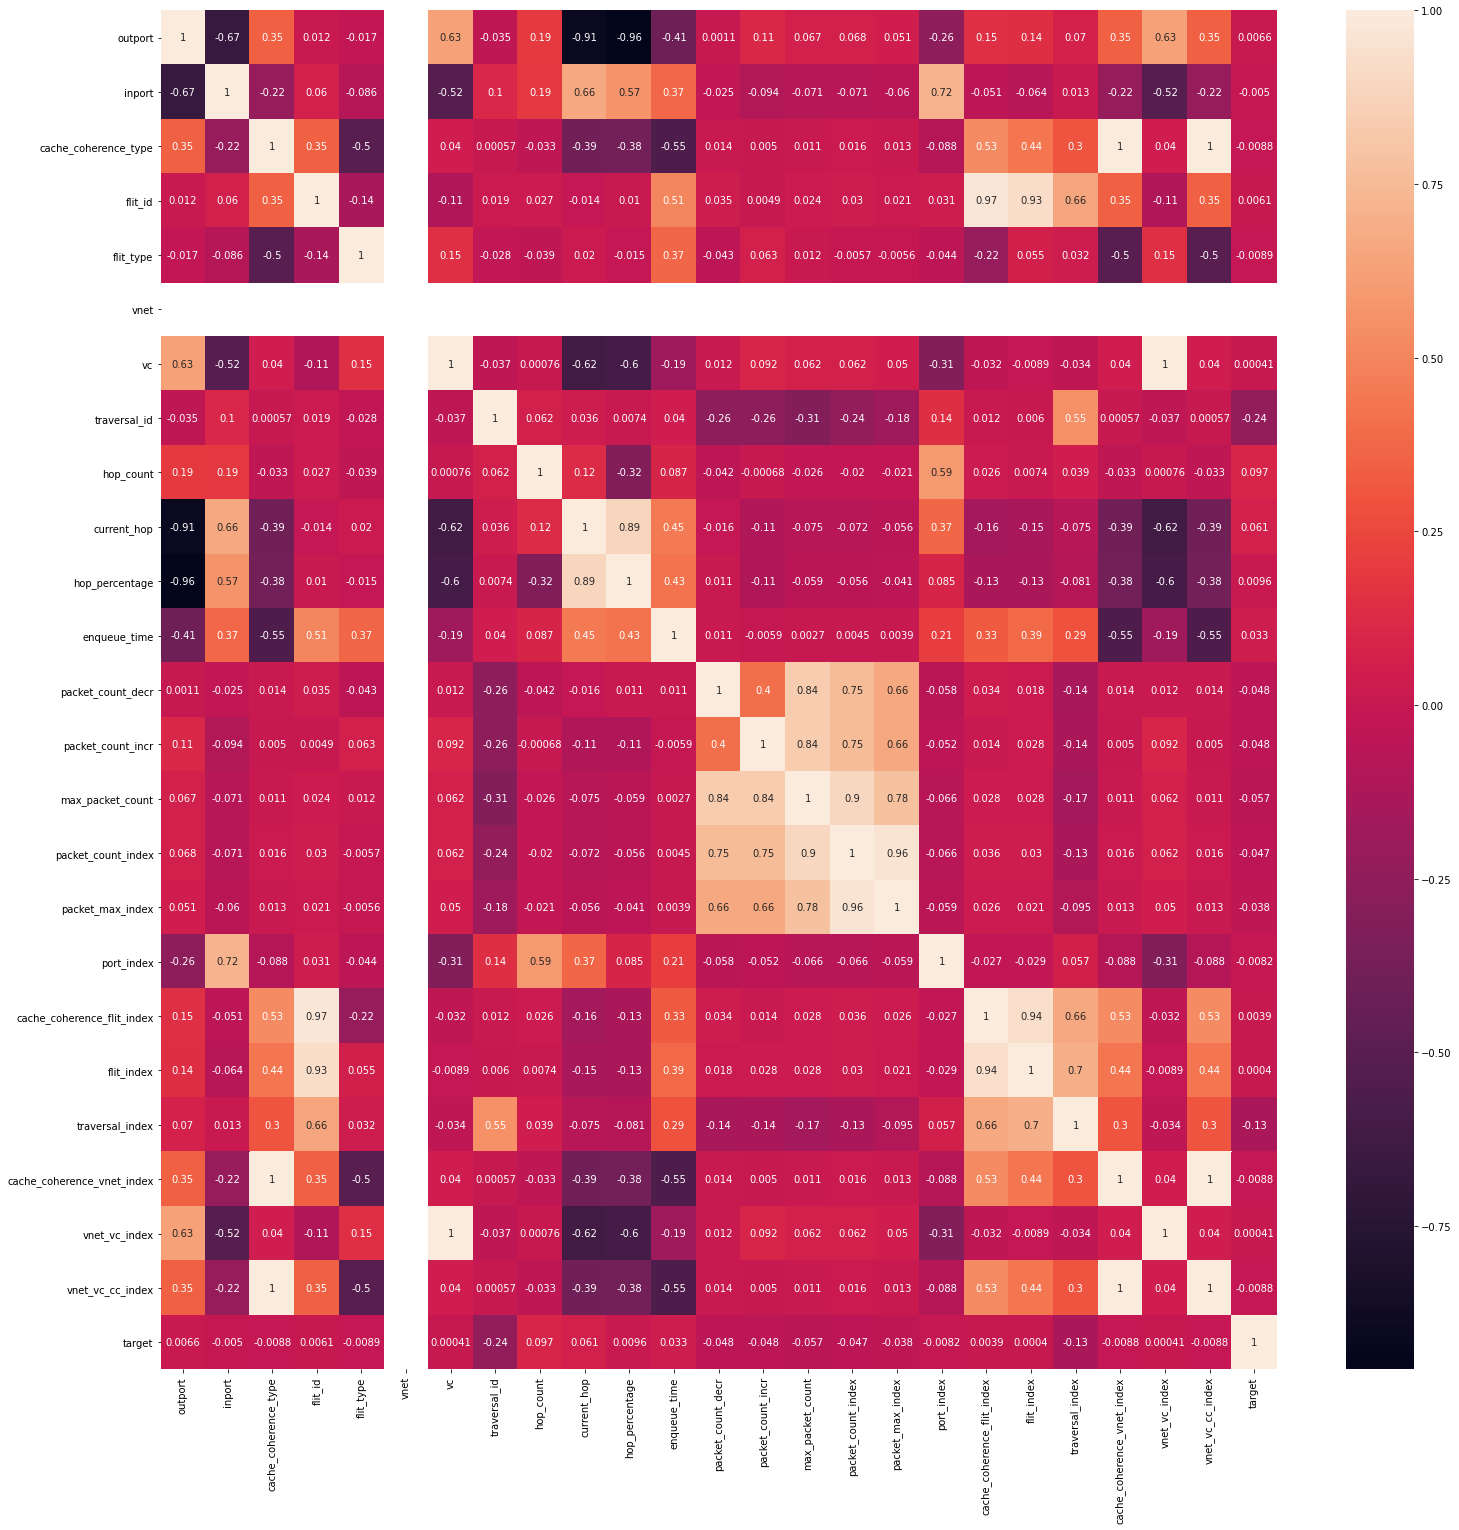

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1,4,1,1,4,3,9,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9
1,1,4,1,1,4,3,9,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9
2,1,4,1,1,4,3,9,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9
3,1,4,1,1,4,3,9,2,3,2,0.666667,12,2,1,2,2,4,4,1,4,8,3,27,9
4,1,4,1,1,4,3,10,1,4,3,0.750000,16,1,2,2,2,4,4,1,4,4,3,30,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320162,1,4,7,1,4,3,9,20057,4,1,0.250000,9,1,1,1,1,1,4,7,28,561596,21,27,63
320163,1,4,7,1,4,3,9,30089,5,2,0.400000,14,1,1,1,1,1,4,7,28,842492,21,27,63
320164,1,4,7,1,4,3,9,30091,4,1,0.250000,10,1,1,1,1,1,4,7,28,842548,21,27,63
320165,1,4,7,1,4,3,9,30089,5,2,0.400000,14,1,1,1,1,1,4,7,28,842492,21,27,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.04,0.00,0.04,0.005525,0.000634,1.0,0.000000,0.00000,0.000001,0.0,0.000000,0.0
1,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.04,0.00,0.04,0.005525,0.000634,1.0,0.000000,0.00000,0.000001,0.0,0.000000,0.0
2,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.04,0.00,0.04,0.005525,0.000634,1.0,0.000000,0.00000,0.000001,0.0,0.000000,0.0
3,0.25,1.0,0.0,0.0,1.0,0.0,0.000000,0.000033,0.25,0.50,0.666667,0.142857,0.04,0.00,0.04,0.005525,0.000634,1.0,0.000000,0.00000,0.000001,0.0,0.000000,0.0
4,0.25,1.0,0.0,0.0,1.0,0.0,0.333333,0.000000,0.50,0.75,0.750000,0.214286,0.00,0.04,0.04,0.005525,0.000634,1.0,0.000000,0.00000,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320162,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.666467,0.50,0.25,0.250000,0.089286,0.00,0.00,0.00,0.000000,0.000000,1.0,0.206897,0.27907,0.207492,1.0,0.000000,1.0
320163,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.999834,0.75,0.50,0.400000,0.178571,0.00,0.00,0.00,0.000000,0.000000,1.0,0.206897,0.27907,0.311276,1.0,0.000000,1.0
320164,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.999900,0.50,0.25,0.250000,0.107143,0.00,0.00,0.00,0.000000,0.000000,1.0,0.206897,0.27907,0.311296,1.0,0.000000,1.0
320165,0.25,1.0,1.0,0.0,1.0,0.0,0.000000,0.999834,0.75,0.50,0.400000,0.178571,0.00,0.00,0.00,0.000000,0.000000,1.0,0.206897,0.27907,0.311276,1.0,0.000000,1.0


In [0]:
train_X[train_X.duplicated()].shape

(30450, 24)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(30, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.333333,0.500000,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000333,0.333333,0.500000,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
2,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000632,0.333333,0.500000,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000931,0.666667,0.500000,0.60,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000
4,0.00,0.25,0.000000,0.0,1.0,0.0,0.000000,0.001962,0.000000,0.500000,1.00,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000087,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27625,1.00,0.00,0.166667,0.0,1.0,0.0,0.333333,0.999435,0.333333,0.000000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088890,0.166667,0.333333,0.166667
27626,0.25,0.00,1.000000,0.0,1.0,0.0,0.666667,0.999401,0.000000,0.000000,0.00,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311110,1.000000,0.666667,1.000000
27627,0.00,0.25,0.333333,0.0,1.0,0.0,0.000000,0.999435,0.333333,0.666667,1.00,0.339286,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133336,0.333333,0.000000,0.333333
27628,0.25,1.00,1.000000,0.0,1.0,0.0,0.000000,0.999933,0.666667,0.333333,0.40,0.178571,0.0,0.0,0.0,0.0,0.0,1.0,0.206897,0.279070,0.311276,1.000000,0.000000,1.000000


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(23, 24)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(26, 24)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(26, 24)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(26, 24)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(30, 24)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(28, 24)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(30, 24)


In [0]:
test_X8 = test_X[:30000]
test_X9 = test_X1[:30000]
test_X10  = test_X2[:30000]
test_X11  = test_X3[:30000]
test_X12  = test_X4[:30000]
test_X13  = test_X5[:30000]
test_X14  = test_X6[:30000]
test_X15  = test_X7[:30000]

test_Y8 = test_Y[:30000]
test_Y9 = test_Y1[:30000]
test_Y10  = test_Y2[:30000]
test_Y11  = test_Y3[:30000]
test_Y12  = test_Y4[:30000]
test_Y13  = test_Y5[:30000]
test_Y14  = test_Y6[:30000]
test_Y15  = test_Y7[:30000]

test_X8

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.333333,0.500000,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000333,0.333333,0.500000,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
2,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000632,0.333333,0.500000,0.75,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000
3,0.25,1.00,0.000000,0.0,1.0,0.0,0.000000,0.000931,0.666667,0.500000,0.60,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000
4,0.00,0.25,0.000000,0.0,1.0,0.0,0.000000,0.001962,0.000000,0.500000,1.00,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000087,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27625,1.00,0.00,0.166667,0.0,1.0,0.0,0.333333,0.999435,0.333333,0.000000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088890,0.166667,0.333333,0.166667
27626,0.25,0.00,1.000000,0.0,1.0,0.0,0.666667,0.999401,0.000000,0.000000,0.00,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311110,1.000000,0.666667,1.000000
27627,0.00,0.25,0.333333,0.0,1.0,0.0,0.000000,0.999435,0.333333,0.666667,1.00,0.339286,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133336,0.333333,0.000000,0.333333
27628,0.25,1.00,1.000000,0.0,1.0,0.0,0.000000,0.999933,0.666667,0.333333,0.40,0.178571,0.0,0.0,0.0,0.0,0.0,1.0,0.206897,0.279070,0.311276,1.000000,0.000000,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    241245
1     78922
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                   Specs        Score
7           traversal_id  2647.929988
20       traversal_index   872.697273
14      max_packet_count   349.327295
8              hop_count   335.990825
9            current_hop   256.007215
12     packet_count_decr   176.673112
13     packet_count_incr   172.665953
15    packet_count_index   146.080222
16      packet_max_index    87.283637
11          enqueue_time    31.670985
17            port_index    17.238931
0                outport     6.734271
10        hop_percentage     6.406574
4              flit_type     5.450585
1                 inport     3.513158
3                flit_id     3.175299
2   cache_coherence_type     1.767931


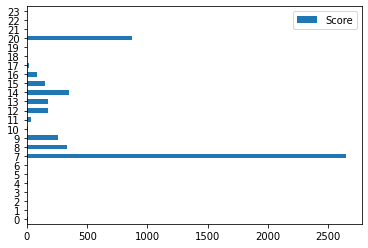

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 75.19843206459144
Test Prediction  75.18349626760784


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X7)
logreg_score_test = accuracy_score(test_Y7,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.10278682591387
Test Prediction  96.52467930842164
Test Prediction  91.74423004161937
Test Prediction  91.10387260224394
Test Prediction  91.45667801740447
Test Prediction  96.35375135918811
Test Prediction  91.8161180476731
Test Prediction  91.86029677886356


In [0]:
y_pred_test = logreg.predict(test_X8)
logreg_score_test = accuracy_score(test_Y8,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X9)
logreg_score_test = accuracy_score(test_Y9,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X10)
logreg_score_test = accuracy_score(test_Y10,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X11)
logreg_score_test = accuracy_score(test_Y11,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X12)
logreg_score_test = accuracy_score(test_Y12,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X13)
logreg_score_test = accuracy_score(test_Y13,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X14)
logreg_score_test = accuracy_score(test_Y14,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X15)
logreg_score_test = accuracy_score(test_Y15,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.10278682591387
Test Prediction  96.52467930842164
Test Prediction  91.74423004161937
Test Prediction  91.10387260224394
Test Prediction  91.45667801740447
Test Prediction  96.35375135918811
Test Prediction  91.8161180476731
Test Prediction  91.86029677886356


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
16,packet_max_index,5.617554
0,outport,3.260589
11,enqueue_time,2.405714
9,current_hop,1.914842
10,hop_percentage,1.467807
8,hop_count,1.233990
21,cache_coherence_vnet_index,0.648645
23,vnet_vc_cc_index,0.648645
2,cache_coherence_type,0.648645
1,inport,0.469054


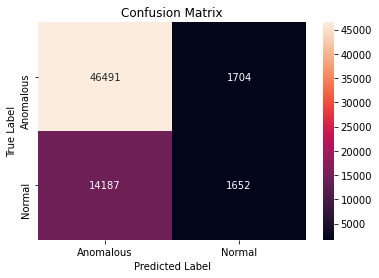

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     48195
           1       0.49      0.10      0.17     15839

    accuracy                           0.75     64034
   macro avg       0.63      0.53      0.51     64034
weighted avg       0.70      0.75      0.69     64034



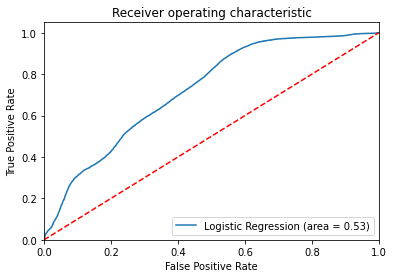

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

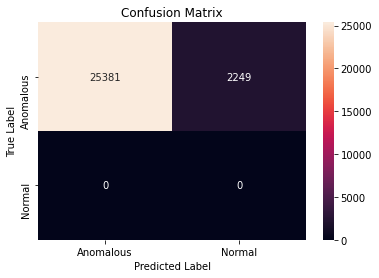

In [0]:
cm = confusion_matrix(test_Y15, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     27630
           1       0.00      0.00      0.00         0

    accuracy                           0.92     27630
   macro avg       0.50      0.46      0.48     27630
weighted avg       1.00      0.92      0.96     27630



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 89.10644079443102
Test Prediction  83.31511384576945


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X7)
knn_score_test = accuracy_score(test_Y7,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  91.62504524068042
Test Prediction  88.319157836029
Test Prediction  91.1085887249338
Test Prediction  93.19942091929062
Test Prediction  88.45251608021188
Test Prediction  91.96085538238492
Test Prediction  90.46538024971623
Test Prediction  93.695258776692


In [0]:
y_pred_knn_test= knn.predict(test_X8)
knn_score_test = accuracy_score(test_Y8,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X9)
knn_score_test = accuracy_score(test_Y9,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X10)
knn_score_test = accuracy_score(test_Y10,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X11)
knn_score_test = accuracy_score(test_Y11,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X12)
knn_score_test = accuracy_score(test_Y12,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X13)
knn_score_test = accuracy_score(test_Y13,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X14)
knn_score_test = accuracy_score(test_Y14,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X15)
knn_score_test = accuracy_score(test_Y15,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  91.62504524068042
Test Prediction  88.319157836029
Test Prediction  91.1085887249338
Test Prediction  93.19942091929062
Test Prediction  88.45251608021188
Test Prediction  91.96085538238492
Test Prediction  90.46538024971623
Test Prediction  93.695258776692


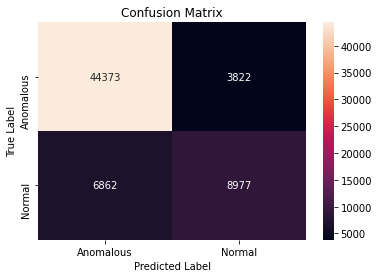

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     48195
           1       0.70      0.57      0.63     15839

    accuracy                           0.83     64034
   macro avg       0.78      0.74      0.76     64034
weighted avg       0.83      0.83      0.83     64034



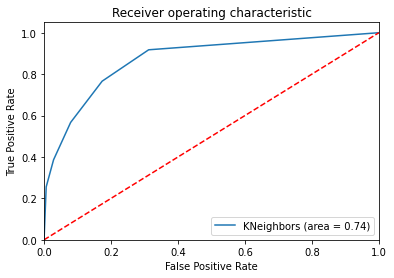

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

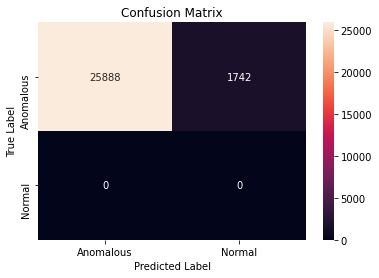

In [0]:
cm = confusion_matrix(test_Y15, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     27630
           1       0.00      0.00      0.00         0

    accuracy                           0.94     27630
   macro avg       0.50      0.47      0.48     27630
weighted avg       1.00      0.94      0.97     27630



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 53.22469185930747
Test Prediction Score 53.032763844207764


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X7)
nb_score_test = accuracy_score(test_Y7,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 41.302931596091206
Test Prediction  39.79712771890686
Test Prediction  40.87400681044268
Test Prediction  39.011943539630835
Test Prediction  40.264850548618995
Test Prediction  40.08336353751359
Test Prediction  40.4729474082482
Test Prediction  39.677886355410784


In [0]:
y_pred_nb_test= nb.predict(test_X8)
nb_score_test = accuracy_score(test_Y8,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X9)
nb_score_test = accuracy_score(test_Y9,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X10)
nb_score_test = accuracy_score(test_Y10,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X11)
nb_score_test = accuracy_score(test_Y11,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X12)
nb_score_test = accuracy_score(test_Y12,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X13)
nb_score_test = accuracy_score(test_Y13,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X14)
nb_score_test = accuracy_score(test_Y14,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X15)
nb_score_test = accuracy_score(test_Y15,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 41.302931596091206
Test Prediction  39.79712771890686
Test Prediction  40.87400681044268
Test Prediction  39.011943539630835
Test Prediction  40.264850548618995
Test Prediction  40.08336353751359
Test Prediction  40.4729474082482
Test Prediction  39.677886355410784


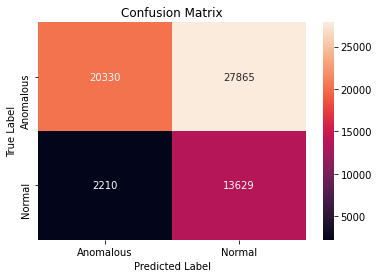

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57     48195
           1       0.33      0.86      0.48     15839

    accuracy                           0.53     64034
   macro avg       0.62      0.64      0.53     64034
weighted avg       0.76      0.53      0.55     64034



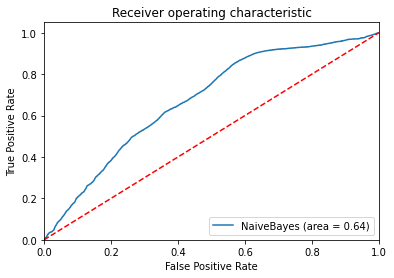

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 204906 samples, validate on 51227 samples
Epoch 1/15
204906/204906 [==============================] - 7s 35us/step - loss: 0.1761 - accuracy: 0.7507 - val_loss: 0.1691 - val_accuracy: 0.7529
Epoch 2/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1686 - accuracy: 0.7539 - val_loss: 0.1682 - val_accuracy: 0.7529
Epoch 3/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1677 - accuracy: 0.7539 - val_loss: 0.1671 - val_accuracy: 0.7529
Epoch 4/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1671 - accuracy: 0.7539 - val_loss: 0.1665 - val_accuracy: 0.7529
Epoch 5/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1666 - accuracy: 0.7539 - val_loss: 0.1662 - val_accuracy: 0.7529
Epoch 6/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1662 - accuracy: 0.7539 - val_loss: 0.1657 - val_accuracy: 0.7529
Epoch 7/15
204906/204906 [=============================

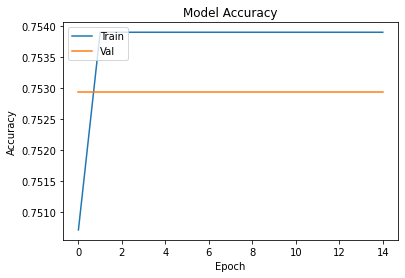

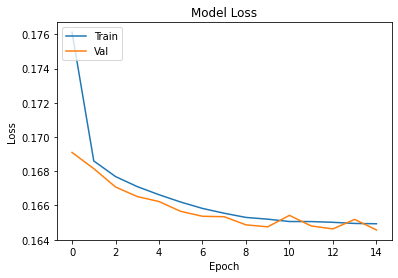

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.26%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 204906 samples, validate on 51227 samples
Epoch 1/15
204906/204906 [==============================] - 7s 35us/step - loss: 0.1855 - accuracy: 0.7539 - val_loss: 0.1813 - val_accuracy: 0.7529
Epoch 2/15
204906/204906 [==============================] - 7s 36us/step - loss: 0.1774 - accuracy: 0.7539 - val_loss: 0.1743 - val_accuracy: 0.7529
Epoch 3/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1722 - accuracy: 0.7539 - val_loss: 0.1702 - val_accuracy: 0.7529
Epoch 4/15
204906/204906 [==============================] - 7s 33us/step - loss: 0.1691 - accuracy: 0.7539 - val_loss: 0.1678 - val_accuracy: 0.7529
Epoch 5/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1674 - accuracy: 0.7539 - val_loss: 0.1669 - val_accuracy: 0.7529
Epoch 6/15
204906/204906 [==============================] - 7s 34us/step - loss: 0.1667 - accuracy: 0.7539 - val_loss: 0.1662 - val_accuracy: 0.7529
Epoch 7/15
204906/204906 [=============================

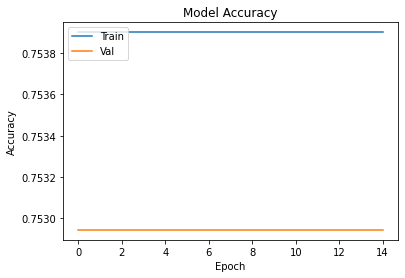

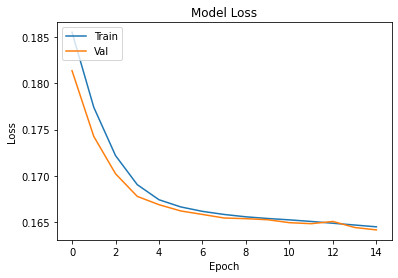

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.26%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 204906 samples, validate on 51227 samples
Epoch 1/30
204906/204906 [==============================] - 8s 37us/step - loss: 0.1853 - accuracy: 0.7539 - val_loss: 0.1788 - val_accuracy: 0.7529
Epoch 2/30
204906/204906 [==============================] - 7s 36us/step - loss: 0.1753 - accuracy: 0.7539 - val_loss: 0.1726 - val_accuracy: 0.7529
Epoch 3/30
204906/204906 [==============================] - 7s 36us/step - loss: 0.1712 - accuracy: 0.7539 - val_loss: 0.1701 - val_accuracy: 0.7529
Epoch 4/30
204906/204906 [==============================] - 7s 36us/step - loss: 0.1693 - accuracy: 0.7539 - val_loss: 0.1683 - val_accuracy: 0.7529
Epoch 5/30
204906/204906 [==============================] - 7s 36us/step - loss: 0.1670 - accuracy: 0.7539 - val_loss: 0.1655 - val_accuracy: 0.7529
Epoch 6/30
204906/204906 [==============================] - 7s 36us/step - loss: 0.1645 - accuracy: 0.7539 - val_loss: 0.1633 - val_accuracy: 0.7529
Epoch 7/30
204906/204906 [=============================

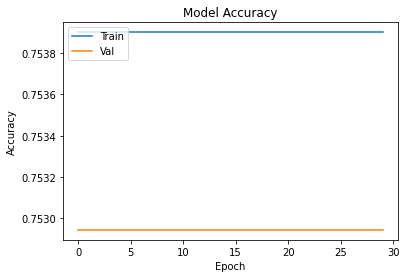

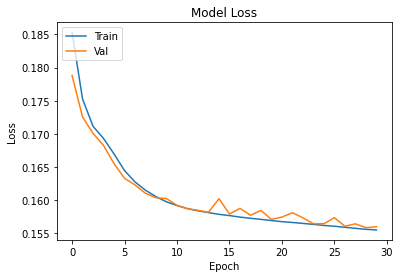

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.26%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 204906 samples, validate on 51227 samples
Epoch 1/50
204906/204906 [==============================] - 16s 79us/step - loss: 0.1595 - accuracy: 0.7562 - val_loss: 0.1529 - val_accuracy: 0.7759
Epoch 2/50
204906/204906 [==============================] - 15s 74us/step - loss: 0.1537 - accuracy: 0.7630 - val_loss: 0.1495 - val_accuracy: 0.7730
Epoch 3/50
204906/204906 [==============================] - 15s 74us/step - loss: 0.1520 - accuracy: 0.7658 - val_loss: 0.1484 - val_accuracy: 0.7725
Epoch 4/50
204906/204906 [==============================] - 15s 72us/step - loss: 0.1506 - accuracy: 0.7667 - val_loss: 0.1466 - val_accuracy: 0.7743
Epoch 5/50
204906/204906 [==============================] - 15s 74us/step - loss: 0.1493 - accuracy: 0.7697 - val_loss: 0.1444 - val_accuracy: 0.7768
Epoch 6/50
204906/204906 [==============================] - 15s 72us/step - loss: 0.1486 - accuracy: 0.7702 - val_loss: 0.1454 - val_accuracy: 0.7639
Epoch 7/50
204906/204906 [=======================

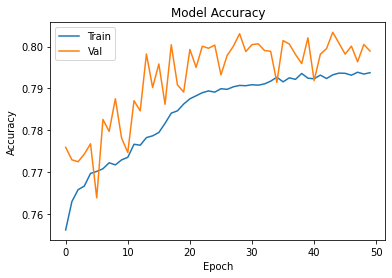

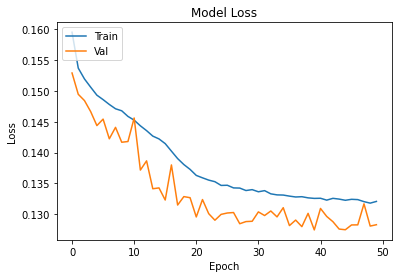

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.87%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.63%
accuracy: 95.16%
accuracy: 96.83%
accuracy: 94.91%
accuracy: 97.50%
accuracy: 95.48%
accuracy: 96.75%
accuracy: 95.19%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.63%
accuracy: 95.16%
accuracy: 96.83%
accuracy: 94.91%
accuracy: 97.50%
accuracy: 95.48%
accuracy: 96.75%
accuracy: 95.19%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 204906 samples, validate on 51227 samples
Epoch 1/50
204906/204906 [==============================] - 15s 72us/step - loss: 0.1603 - accuracy: 0.7566 - val_loss: 0.1531 - val_accuracy: 0.7596
Epoch 2/50
204906/204906 [==============================] - 15s 71us/step - loss: 0.1545 - accuracy: 0.7630 - val_loss: 0.1505 - val_accuracy: 0.7620
Epoch 3/50
204906/204906 [==============================] - 15s 72us/step - loss: 0.1528 - accuracy: 0.7660 - val_loss: 0.1550 - val_accuracy: 0.7562
Epoch 4/50
204906/204906 [==============================] - 14s 70us/step - loss: 0.1520 - accuracy: 0.7659 - val_loss: 0.1467 - val_accuracy: 0.7711
Epoch 5/50
204906/204906 [==============================] - 14s 70us/step - loss: 0.1514 - accuracy: 0.7663 - val_loss: 0.1480 - val_accuracy: 0.7732
Epoch 6/50
204906/204906 [==============================] - 15s 71us/step - loss: 0.1504 - accuracy: 0.7677 - val_loss: 0.1444 - val_accuracy: 0.7764
Epoch 7/50
204906/204906 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.85%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.62%
accuracy: 91.82%
accuracy: 96.19%
accuracy: 92.25%
accuracy: 96.21%
accuracy: 93.27%
accuracy: 96.09%
accuracy: 92.74%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.62%
accuracy: 91.82%
accuracy: 96.19%
accuracy: 92.25%
accuracy: 96.21%
accuracy: 93.27%
accuracy: 96.09%
accuracy: 92.74%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.6694373626202
Test Prediction Score 91.55604834931442


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 89.78646398841839
Test Prediction Score 85.345789180145
Test Prediction Score 89.2395005675369
Test Prediction Score 91.28845457835686
Test Prediction Score 90.57510404842981
Test Prediction Score 89.99275099673795
Test Prediction Score 88.45251608021188
Test Prediction Score 91.35722041259501


In [0]:
y_pred_dt_test= dt.predict(test_X8)
dt_score_test = accuracy_score(test_Y8,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X9)
dt_score_test = accuracy_score(test_Y9,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X10)
dt_score_test = accuracy_score(test_Y10,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X11)
dt_score_test = accuracy_score(test_Y11,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X12)
dt_score_test = accuracy_score(test_Y12,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X13)
dt_score_test = accuracy_score(test_Y13,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X14)
dt_score_test = accuracy_score(test_Y14,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X15)
dt_score_test = accuracy_score(test_Y15,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 89.78646398841839
Test Prediction Score 85.345789180145
Test Prediction Score 89.2395005675369
Test Prediction Score 91.28845457835686
Test Prediction Score 90.57510404842981
Test Prediction Score 89.99275099673795
Test Prediction Score 88.45251608021188
Test Prediction Score 91.35722041259501


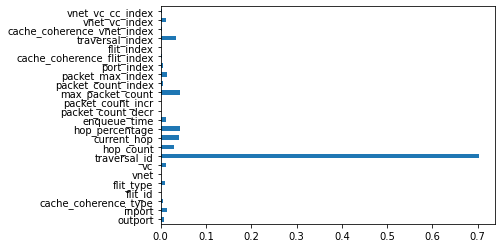

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

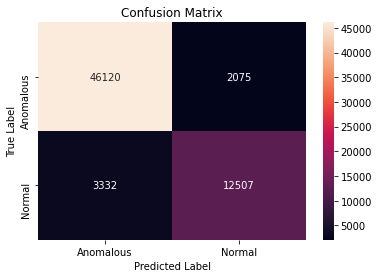

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     48195
           1       0.86      0.79      0.82     15839

    accuracy                           0.92     64034
   macro avg       0.90      0.87      0.88     64034
weighted avg       0.91      0.92      0.91     64034



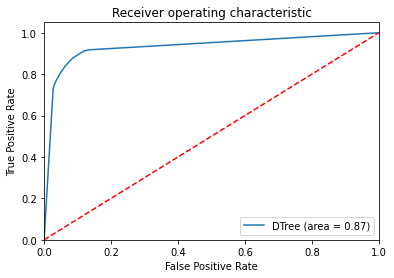

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.7788883119317
Test Prediction Score 92.24786831995503


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X7)
rf_score_test = accuracy_score(test_Y7,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 90.33659066232356
Test Prediction Score 85.09132738427216
Test Prediction Score 90.03026863412788
Test Prediction Score 91.63590300398118
Test Prediction Score 90.61293984108967
Test Prediction Score 90.12323305545488
Test Prediction Score 88.86114264093833
Test Prediction Score 91.8494390155628


In [0]:
y_pred_rf_test= rf.predict(test_X8)
rf_score_test = accuracy_score(test_Y8,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X9)
rf_score_test = accuracy_score(test_Y9,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X10)
rf_score_test = accuracy_score(test_Y10,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X11)
rf_score_test = accuracy_score(test_Y11,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X12)
rf_score_test = accuracy_score(test_Y12,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X13)
rf_score_test = accuracy_score(test_Y13,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X14)
rf_score_test = accuracy_score(test_Y14,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X15)
rf_score_test = accuracy_score(test_Y15,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 90.33659066232356
Test Prediction Score 85.09132738427216
Test Prediction Score 90.03026863412788
Test Prediction Score 91.63590300398118
Test Prediction Score 90.61293984108967
Test Prediction Score 90.12323305545488
Test Prediction Score 88.86114264093833
Test Prediction Score 91.8494390155628


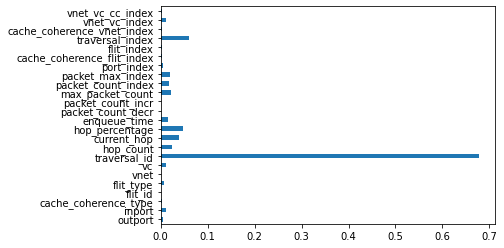

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

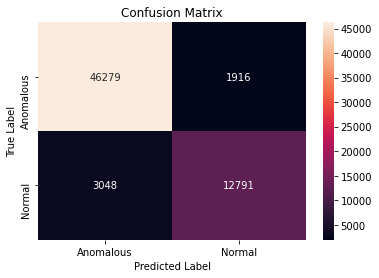

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     48195
           1       0.87      0.81      0.84     15839

    accuracy                           0.92     64034
   macro avg       0.90      0.88      0.89     64034
weighted avg       0.92      0.92      0.92     64034



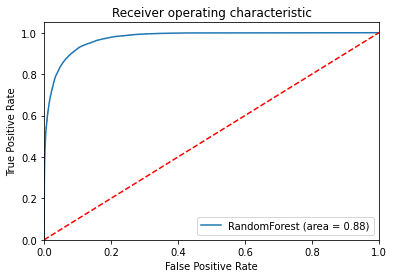

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.43362628009666
Test Prediction Score 93.7095917793672


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 91.05320304017373
Test Prediction Score 85.2063580591188
Test Prediction Score 90.31025349981083
Test Prediction Score 92.07021353601158
Test Prediction Score 90.73401437760121
Test Prediction Score 90.00724900326205
Test Prediction Score 89.24328414680286
Test Prediction Score 92.31994209192906


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X8)
xgbc_score_test = accuracy_score(test_Y8,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X9)
xgbc_score_test = accuracy_score(test_Y9,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X10)
xgbc_score_test = accuracy_score(test_Y10,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X11)
xgbc_score_test = accuracy_score(test_Y11,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X12)
xgbc_score_test = accuracy_score(test_Y12,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X13)
xgbc_score_test = accuracy_score(test_Y13,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X14)
xgbc_score_test = accuracy_score(test_Y14,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X15)
xgbc_score_test = accuracy_score(test_Y15,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 91.05320304017373
Test Prediction Score 85.2063580591188
Test Prediction Score 90.31025349981083
Test Prediction Score 92.07021353601158
Test Prediction Score 90.73401437760121
Test Prediction Score 90.00724900326205
Test Prediction Score 89.24328414680286
Test Prediction Score 92.31994209192906


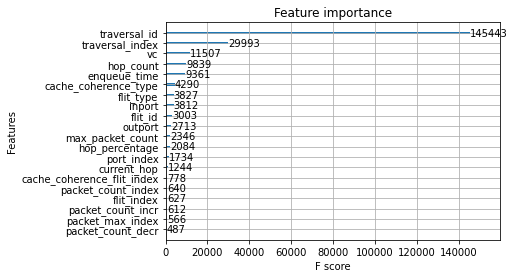

In [0]:
plot_importance(xgbc)
plt.show()

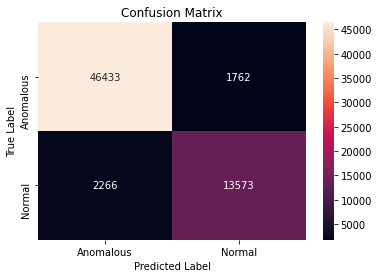

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     48195
           1       0.89      0.86      0.87     15839

    accuracy                           0.94     64034
   macro avg       0.92      0.91      0.91     64034
weighted avg       0.94      0.94      0.94     64034



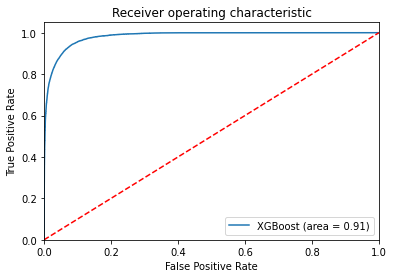

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.22095942342455
Test Prediction Score 84.22400599681418


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X7)
gbm_score_test = accuracy_score(test_Y7,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 94.36120159247196
Test Prediction Score 92.23020078081427
Test Prediction Score 92.10745365115399
Test Prediction Score 94.35758233803836
Test Prediction Score 95.27052591751797
Test Prediction Score 93.68249365712215
Test Prediction Score 91.91449110858872
Test Prediction Score 94.52044878754975


In [0]:
y_pred_gbm_test = gbm.predict(test_X8)
gbm_score_test = accuracy_score(test_Y8,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X9)
gbm_score_test = accuracy_score(test_Y9,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X10)
gbm_score_test = accuracy_score(test_Y10,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X11)
gbm_score_test = accuracy_score(test_Y11,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X12)
gbm_score_test = accuracy_score(test_Y12,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X13)
gbm_score_test = accuracy_score(test_Y13,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X14)
gbm_score_test = accuracy_score(test_Y14,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X15)
gbm_score_test = accuracy_score(test_Y15,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 94.36120159247196
Test Prediction Score 92.23020078081427
Test Prediction Score 92.10745365115399
Test Prediction Score 94.35758233803836
Test Prediction Score 95.27052591751797
Test Prediction Score 93.68249365712215
Test Prediction Score 91.91449110858872
Test Prediction Score 94.52044878754975


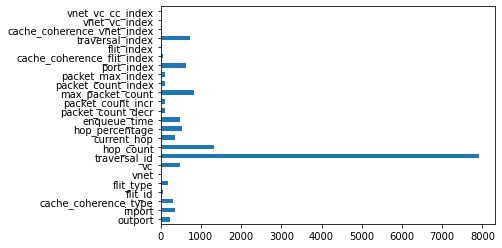

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

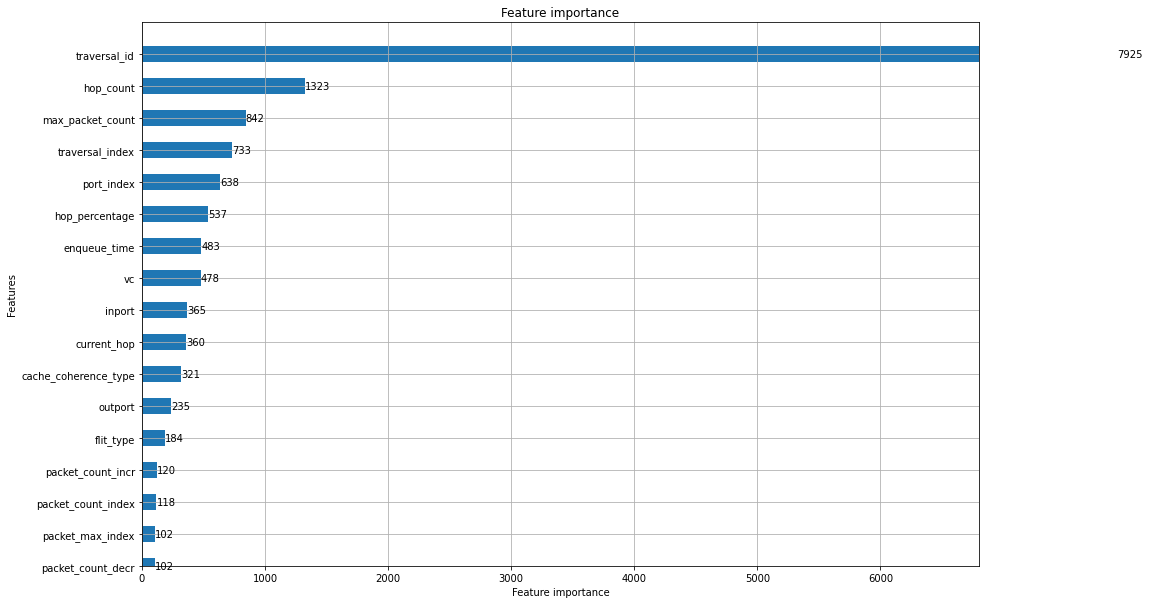

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7925,
 1323,
 842,
 733,
 638,
 537,
 483,
 478,
 365,
 360,
 321,
 235,
 184,
 120,
 118,
 102,
 102,
 59,
 52,
 23,
 0,
 0,
 0,
 0]

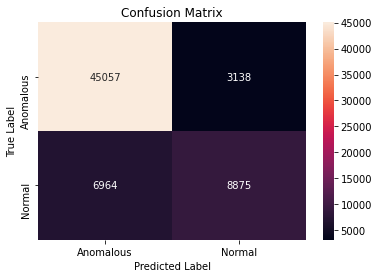

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     48195
           1       0.74      0.56      0.64     15839

    accuracy                           0.84     64034
   macro avg       0.80      0.75      0.77     64034
weighted avg       0.83      0.84      0.83     64034



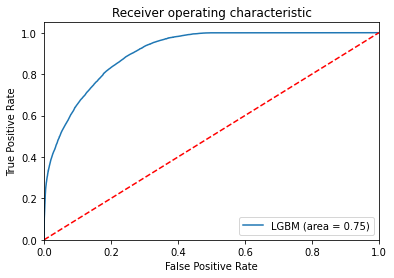

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()